In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data= pd.read_csv("/content/drive/MyDrive/Jobaaj Projects/exam_sales_python/sales_dataset.csv")
data.head(5)

<ipython-input-8-6505b234137a>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/content/drive/MyDrive/Jobaaj Projects/exam_sales_python/sales_dataset.csv")


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Data Cleaning



In [9]:
# 6. Standardize column names (e.g., remove spaces, convert to lowercase)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
data.nunique()

,0
order_id,120352
date,91
status,13
fulfilment,2
sales_channel,2
ship-service-level,2
style,1377
sku,7195
category,9
size,11


In [11]:
# to find the unique values
data.apply(pd.unique)

,0
order_id,"[405-8078784-5731545, 171-9198151-1101146, 404..."
date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
fulfilment,"[Merchant, Amazon]"
sales_channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
size,"[S, 3XL, XL, L, XXL, M, XS, 6XL, 4XL, 5XL, Free]"


In [12]:
# Display basic info about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            128949 non-null  object 
 1   date                128949 non-null  object 
 2   status              128949 non-null  object 
 3   fulfilment          128949 non-null  object 
 4   sales_channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   style               128949 non-null  object 
 7   sku                 128949 non-null  object 
 8   category            128949 non-null  object 
 9   size                128949 non-null  object 
 10  asin                128949 non-null  object 
 11  courier_status      122078 non-null  object 
 12  qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  amount              121155 non-null  float64
 15  ship-city           128916 non-nul

Converting the columns to correct data types

In [13]:
data['order_id'] = data['order_id'].astype('string')
data['date'] = pd.to_datetime(data['date'])  # Parse as datetime
data['status'] = data['status'].astype('string')
data['fulfilment'] = data['fulfilment'].astype('string')
data['sales_channel'] = data['sales_channel'].astype('string')
data['ship-service-level'] = data['ship-service-level'].astype('string')
data['style'] = data['style'].astype('string')
data['sku'] = data['sku'].astype('string')
data['category'] = data['category'].astype('string')
data['size'] = data['size'].astype('string')  # or 'string' if sizes are mixed (e.g., "10", "XL")
# data['Quantity'] = data['Quantity'].astype('int64')
data['currency'] = data['currency'].astype('string')
data['amount'] = data['amount'].astype('float64')
data['ship-city'] = data['ship-city'].astype('string')
data['ship-state'] = data['ship-state'].astype('string')
data['ship-country'] = data['ship-country'].astype('string')
data['ship-postal-code'] = data['ship-postal-code'].astype('Int64')
data['promotion-ids'] = data['promotion-ids'].astype('string')  # or split into lists if needed
data['b2b'] = data['b2b'].astype('bool')  # Ensure this column is True/False or 1/0 first
data['fulfilled-by'] = data['fulfilled-by'].astype('string')

<ipython-input-13-be32857193c3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])  # Parse as datetime


In [14]:
data.isnull().sum()

,0
order_id,0
date,0
status,0
fulfilment,0
sales_channel,0
ship-service-level,0
style,0
sku,0
category,0
size,0


In [15]:
#Calculating duplicates
data.duplicated().sum()

np.int64(6)

In [16]:
# removing the duplicate rows
data = data.drop_duplicates()

In [17]:
# Column names
print(data.columns)

Index(['order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'b2b', 'fulfilled-by', 'unnamed:_22'],
      dtype='object')


In [18]:
# Dropping unnecessary columns
df = data.drop(columns=['asin', 'sku', 'style', 'unnamed:_22'], axis=1)

In [19]:
df.head(5)

,order_id,date,status,fulfilment,sales_channel,ship-service-level,category,size,courier_status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,b2b,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Set,S,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,<NA>,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,<NA>
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,<NA>,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,<NA>,False,<NA>


In [20]:
df.columns

Index(['order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'promotion-ids', 'b2b', 'fulfilled-by'],
      dtype='object')

In [21]:
df.dtypes

,0
order_id,string[python]
date,datetime64[ns]
status,string[python]
fulfilment,string[python]
sales_channel,string[python]
ship-service-level,string[python]
category,string[python]
size,string[python]
courier_status,object
qty,int64


Cleaning the ship-state column

In [22]:
#Checking the unique names of the state
df['ship-state'].unique()

<StringArray>
[           'MAHARASHTRA',              'KARNATAKA',             'PUDUCHERRY',
             'TAMIL NADU',          'UTTAR PRADESH',             'CHANDIGARH',
              'TELANGANA',                  'ASSAM',              'JHARKHAND',
           'CHHATTISGARH',         'ANDHRA PRADESH',                 'ODISHA',
                  'DELHI',                 'KERALA',         'MADHYA PRADESH',
            'WEST BENGAL',               'NAGALAND',              'RAJASTHAN',
                'Gujarat',            'UTTARAKHAND',                  'BIHAR',
        'JAMMU & KASHMIR',                'HARYANA',                 'PUNJAB',
       'HIMACHAL PRADESH',      'ARUNACHAL PRADESH',                'MANIPUR',
                    'Goa',              'MEGHALAYA',                    'GOA',
                'TRIPURA',                 'LADAKH',        'DADRA AND NAGAR',
                 'SIKKIM',                  'Delhi',                     <NA>,
     'ANDAMAN & NICOBAR ',            

In [23]:
# Create a dictionary to map incorrect or alternate names to correct ones
state_corrections = {
    'RAJSTHAN': 'RAJASTHAN',
    'Rajshthan': 'RAJASTHAN',
    'Rajsthan': 'RAJASTHAN',
    'Rajsthan': 'RAJASTHAN',
    'Goa': 'GOA',
    'goa': 'GOA',
    'DELHI': 'Delhi',
    'Delhi': 'Delhi',
    'Puducherry': 'PUDUCHERRY',
    'Pondicherry': 'PUDUCHERRY',
    'New Delhi': 'Delhi',
    'Orissa': 'Odisha',
    'orissa': 'Odisha',
    'Punjab': 'PUNJAB',
    'punjab': 'PUNJAB',
    'RAJASTHAN': 'RAJASTHAN',
    'MIZORAM': 'Mizoram',
    'meghalaya': 'Meghalaya',
    'APO': 'Andaman & Nicobar',
    'Chandigarh': 'CHANDIGARH',
    'Haryana': 'HARYANA',
    'Telangana': 'TELANGANA',
    'bihar': 'BIHAR',
    'bihar': 'BIHAR',
    'bihar': 'BIHAR',
    'maharashtra': 'MAHARASHTRA',
    'KARNATAKA': 'KARNATAKA',
    'TAMIL NADU': 'TAMIL NADU',
    'TELANGANA': 'TELANGANA',
    'RAJASTHAN': 'RAJASTHAN',
    'HARYANA': 'HARYANA',
    'HIMACHAL PRADESH': 'HIMACHAL PRADESH',
    'Bihar': 'BIHAR',
    'Andaman & Nicobar': 'ANDAMAN & NICOBAR',
    'PUNJAB': 'PUNJAB',
    'Himachal Pradesh': 'HIMACHAL PRADESH',
    'Sikkim': 'SIKKIM',
    'Goa': 'GOA',
    'NL': 'NAGALAND',
    'PUNJAB/MOHALI/ZIRAKPUR': 'PUNJAB',
    'RJ': 'RAJASTHAN',
    'PB': 'PUNJAB',
    'AR': 'ARUNACHAL PRADESH',
}

# Clean up the ship-state column by replacing with the standard names
df['ship-state'] = df['ship-state'].str.upper().replace(state_corrections)

# Convert the first letter of each word to uppercase and the rest to lowercase
df['ship-state'] = df['ship-state'].str.title()

# Handle NaN values (optional) - replacing NaN with 'Unknown'
df['ship-state'].fillna('Unknown', inplace=True)

# Checking the unique states after cleaning
print(df['ship-state'].unique())


<StringArray>
[       'Maharashtra',          'Karnataka',         'Puducherry',
         'Tamil Nadu',      'Uttar Pradesh',         'Chandigarh',
          'Telangana',              'Assam',          'Jharkhand',
       'Chhattisgarh',     'Andhra Pradesh',             'Odisha',
              'Delhi',             'Kerala',     'Madhya Pradesh',
        'West Bengal',           'Nagaland',          'Rajasthan',
            'Gujarat',        'Uttarakhand',              'Bihar',
    'Jammu & Kashmir',            'Haryana',             'Punjab',
   'Himachal Pradesh',  'Arunachal Pradesh',            'Manipur',
                'Goa',          'Meghalaya',            'Tripura',
             'Ladakh',    'Dadra And Nagar',             'Sikkim',
            'Unknown', 'Andaman & Nicobar ',          'Rajshthan',
            'Mizoram',          'New Delhi',             'Orissa',
        'Lakshadweep',  'Andaman & Nicobar',        'Pondicherry']
Length: 42, dtype: string


<ipython-input-23-f22bbd317db7>:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-state'].fillna('Unknown', inplace=True)


Dealing with missing values

In [24]:
# For string columns
string_cols = ['currency', 'ship-city', 'ship-country', 'promotion-ids', 'fulfilled-by', 'courier_status']
df[string_cols] = df[string_cols].fillna("Not_Specified")

# For numeric columns - fill with a numeric value or keep as NaN
# Fill with 0 or another numeric value
numeric_cols = ['amount', 'ship-postal-code']
df[numeric_cols] = df[numeric_cols].fillna(0)  # or another appropriate numeric value


Replacing the null values in the amount column witht the median of it

In [25]:
# Step 1: Set 'amount' to 0 where status is 'cancelled'
df.loc[df['status'].str.lower() == 'cancelled', 'amount'] = 0

# Step 2: Calculate the median of the entire 'amount' column (not grouped by category)
median_amount = df['amount'].median()

# Step 3: Fill NA 'amount' with the overall median value
df['amount'].fillna(median_amount, inplace=True)



<ipython-input-25-0e2beb48c3ab>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(median_amount, inplace=True)


In [26]:
median_amount

545.0

# Graphs

Financial Perfomance Analysis: Total Sales by month

In [27]:
total_sales = df['amount'].sum()
print(f"Total Sales: ₹{total_sales:,.2f}")

Total Sales: ₹71,646,418.62


In [28]:
# Monthly sales
monthly_sales = df.groupby(pd.to_datetime(df['date']).dt.to_period('M'))['amount'].sum()
print("\nMonthly Sales:")
print(monthly_sales)

# Quarterly sales
quarterly_sales = df.groupby(pd.to_datetime(df['date']).dt.to_period('Q'))['amount'].sum()
print("\nQuarterly Sales:")
print(quarterly_sales)

# Therefore it makes sense to plot total sales by month


Monthly Sales:
date
2022-03       94810.00
2022-04    26227884.62
2022-05    23942831.00
2022-06    21380893.00
Freq: M, Name: amount, dtype: float64

Quarterly Sales:
date
2022Q1       94810.00
2022Q2    71551608.62
Freq: Q-DEC, Name: amount, dtype: float64


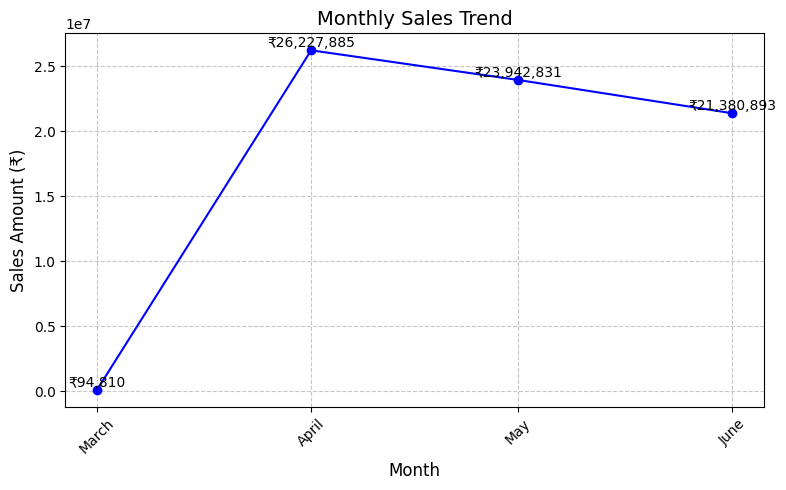

In [29]:
# Total Sales by month
from matplotlib.dates import MonthLocator, DateFormatter

# Extract month and year from the 'Date' column and create a 'Month' column
df['Month'] = df['date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = df.groupby('Month')['amount'].sum().reset_index()

# Convert Period to datetime for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales['Month'], monthly_sales['amount'], marker='o', linestyle='-', color='b')

# Formatting the plot
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount (₹)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis to show full month names
plt.gca().xaxis.set_major_locator(MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Add value annotations on each point
for x, y in zip(monthly_sales['Month'], monthly_sales['amount']):
    plt.text(x, y, f'₹{y:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Financial Perfomance Analysis: Weekly Sales trend

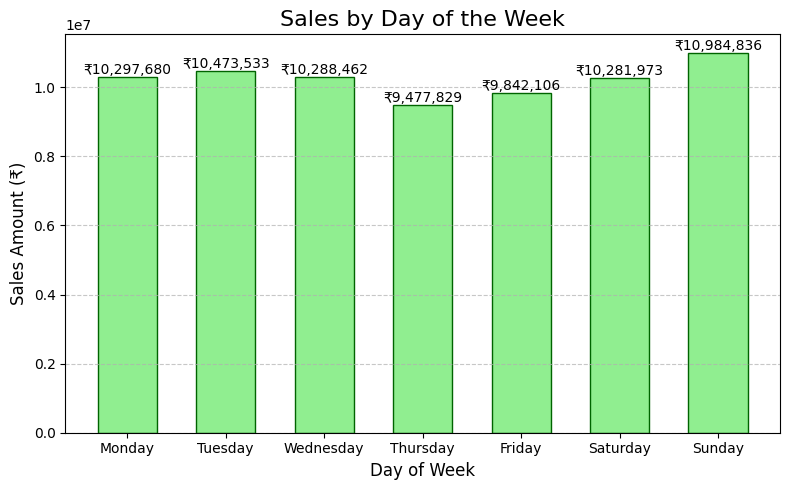

In [30]:
# Extract day of the week (0=Monday, 6=Sunday)
df['Day_of_Week'] = df['date'].dt.dayofweek


weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Weekday_Name'] = df['Day_of_Week'].map(weekday_map)

# Calculate total sales for each day of the week
weekday_sales = df.groupby('Weekday_Name')['amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()


plt.figure(figsize=(8, 5))
plt.bar(weekday_sales['Weekday_Name'], weekday_sales['amount'],
        color='lightgreen', edgecolor='darkgreen', width=0.6)

plt.title('Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Sales Amount (₹)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')


for idx, row in weekday_sales.iterrows():
    plt.text(idx, row['amount'], f'₹{row["amount"]:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Financial Perfomance Analysis: Top Selling products- category


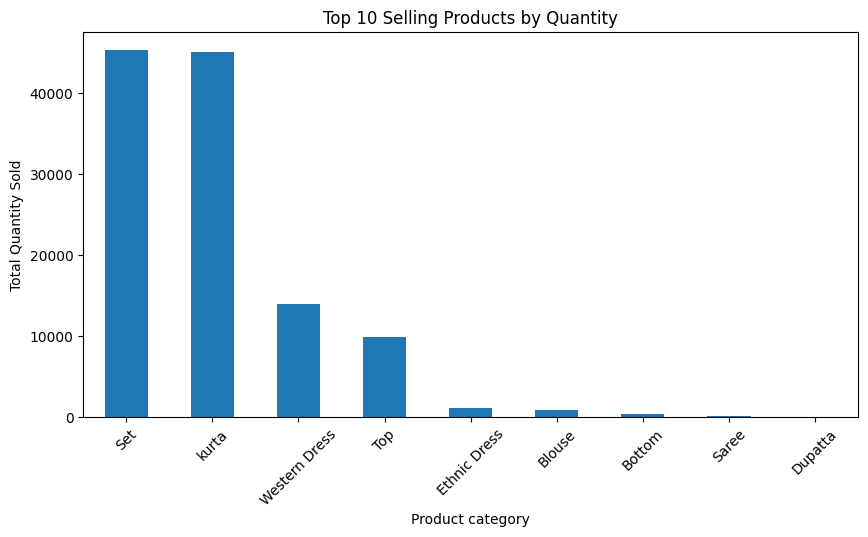

In [31]:
top_products = df.groupby('category')['qty'].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Product category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

Financial Perfomance Analysis: Average order Value distribution

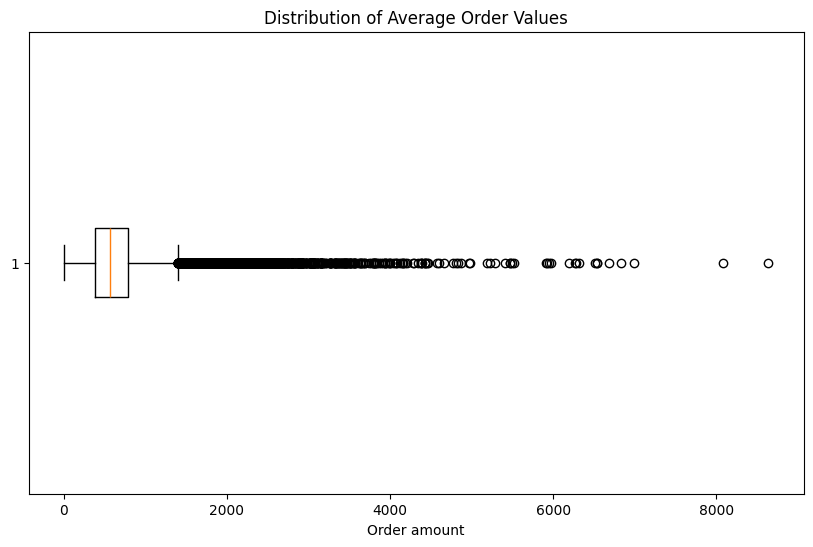

In [32]:
aov = df.groupby('order_id')['amount'].sum()

plt.figure(figsize=(10, 6))
plt.boxplot(aov, vert=False)
plt.title('Distribution of Average Order Values')
plt.xlabel('Order amount')
plt.show()

**Customer insights**

Sales by location (Top 10 states)

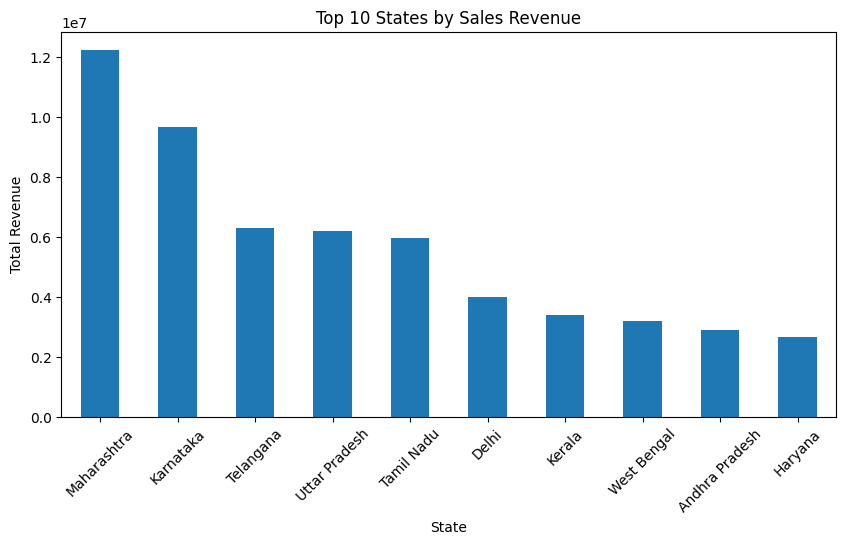

In [33]:
top_states = df.groupby('ship-state')['amount'].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top_states.plot(kind='bar')
plt.title('Top 10 States by Sales Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

B2C vs B2B comparison chart

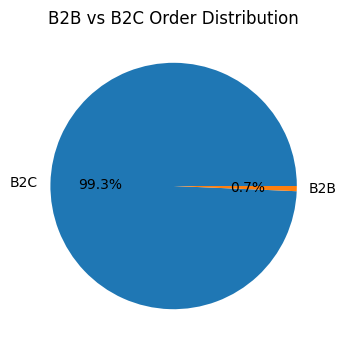

In [34]:
b2b_vs_b2c = df['b2b'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(b2b_vs_b2c, labels=['B2C', 'B2B'], autopct='%1.1f%%')
plt.title('B2B vs B2C Order Distribution')
plt.show()
#Maximum customers are belong to B2C. ONly a small percentage (0.68%) are B2B customers

Order status distribution

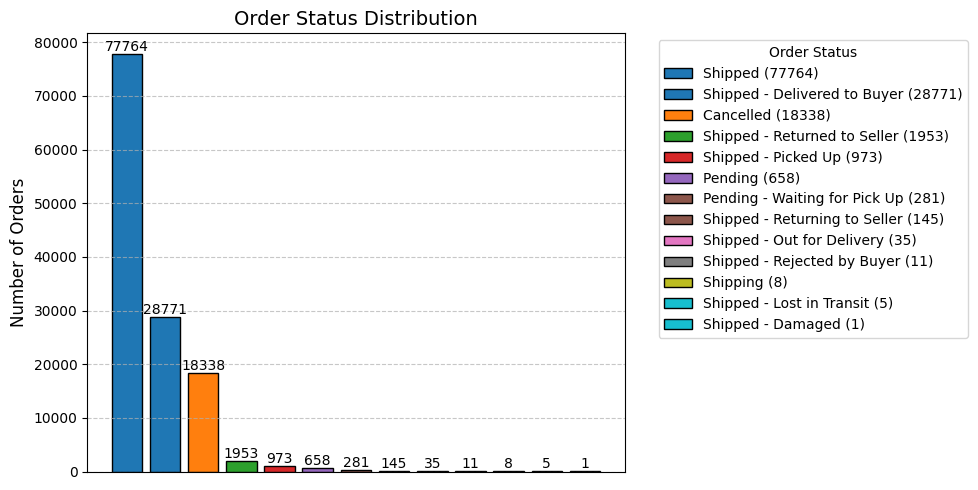

In [35]:
status_dist = df['status'].value_counts()
colors = plt.cm.tab10(np.linspace(0, 1, len(status_dist)))

# Create bar chart with legend
plt.figure(figsize=(10, 5))

bars = plt.bar(range(len(status_dist)), status_dist.values,
               color=colors, edgecolor='black')

plt.title('Order Status Distribution', fontsize=14)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks([])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

legend_labels = [f"{label} ({count})" for label, count in zip(status_dist.index, status_dist.values)]
plt.legend(bars, legend_labels,
           title='Order Status',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Logistics & Fulfillment**

 Shipping Service Level Usage

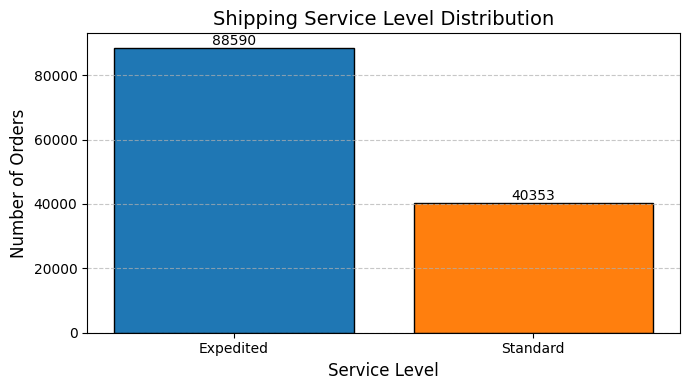

In [36]:
service_level_dist = df['ship-service-level'].value_counts()

plt.figure(figsize=(7, 4))
bars = plt.bar(service_level_dist.index, service_level_dist.values,
               color=['#1f77b4', '#ff7f0e', '#2ca02c'],
               edgecolor='black')

plt.title('Shipping Service Level Distribution', fontsize=14)
plt.xlabel('Service Level', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Customer Satisfaction & Returns**

Return Rate and cancellation rate by Product Category


In [37]:
# Define all return-related statuses
return_statuses = [
    'Shipped - Returned to Seller',
    'Shipped - Rejected by Buyer',
    'Shipped - Returning to Seller',
]

# Define cancellation-related statuses
cancelled_statuses = ['Cancelled']

total_orders = len(df)

# Calculate number of returned and cancelled orders
returned_orders = df['status'].isin(return_statuses).sum()
cancelled_orders = df['status'].isin(cancelled_statuses).sum()

# Calculate rates
overall_return_rate = returned_orders / total_orders
overall_cancel_rate = cancelled_orders / total_orders  # Changed to match the variable in your plot

print(f"Total Orders: {total_orders:,}")
print(f"Returned Orders: {returned_orders:,}")
print(f"Cancelled Orders: {cancelled_orders:,}")
print(f"\nOverall Return Rate: {overall_return_rate:.2%}")
print(f"Overall Cancellation Rate: {overall_cancel_rate:.2%}")


Total Orders: 128,943
Returned Orders: 2,109
Cancelled Orders: 18,338

Overall Return Rate: 1.64%
Overall Cancellation Rate: 14.22%


Return rate by category - Top 10 categories

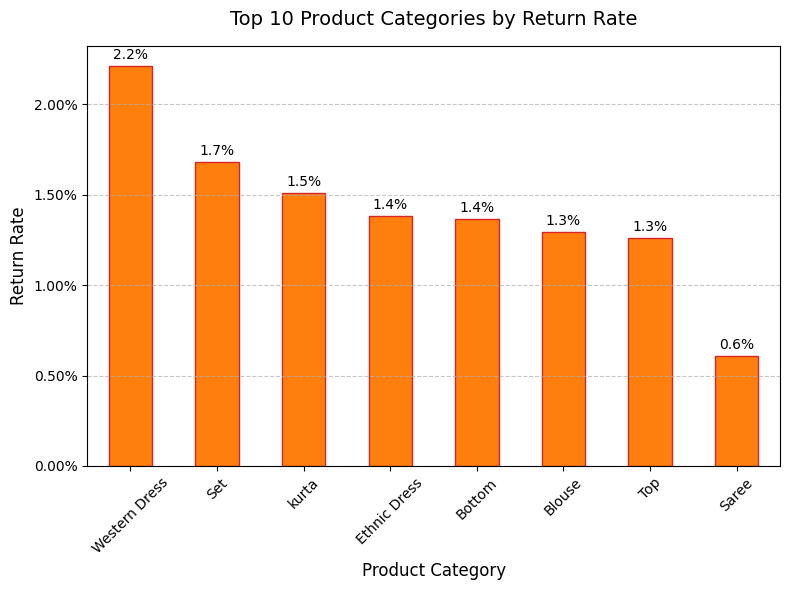

In [38]:
# Calculate total orders and returned orders per category
total_per_category = df['category'].value_counts()
returned_df = df[df['status'].isin(return_statuses)]

# Calculate total orders and returned orders per category
total_per_category = df['category'].value_counts()
returns_per_category = returned_df['category'].value_counts()

# Calculate return rate per category
return_rates = (returns_per_category / total_per_category).dropna()

# Plot top 10 categories by return rate
top_return_rates = return_rates.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
ax = top_return_rates.plot(kind='bar', color='#ff7f0e', edgecolor='#d62728')

plt.title('Top 10 Product Categories by Return Rate', fontsize=14, pad=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Return Rate', fontsize=12)
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

for p in ax.patches:
    rate = p.get_height()
    ax.annotate(f"{rate:.1%}",
                (p.get_x() + p.get_width() / 2., rate),
                ha='center', va='bottom',
                fontsize=10,
                xytext=(0, 3),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Comparison between cancellation vs return rates (overall)

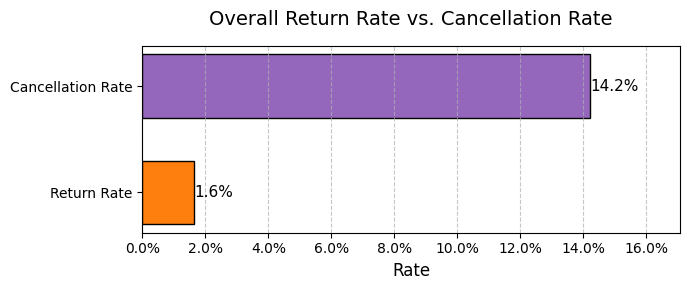

In [39]:
# Comparison between cancellation vs return rates (overall)
# Create comparison data
rates = pd.DataFrame({
    'Metric': ['Return Rate', 'Cancellation Rate'],
    'Value': [overall_return_rate, overall_cancel_rate]
})

plt.figure(figsize=(7, 3))
bars = plt.barh(rates['Metric'], rates['Value'],
                color=['#ff7f0e', '#9467bd'],
                height=0.6,
                edgecolor='black')

plt.title('Overall Return Rate vs. Cancellation Rate', fontsize=14, pad=15)
plt.xlabel('Rate', fontsize=12)
plt.xlim(0, max(rates['Value']) * 1.2)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.1%}',
             ha='left', va='center',
             fontsize=11)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Return Rate by month

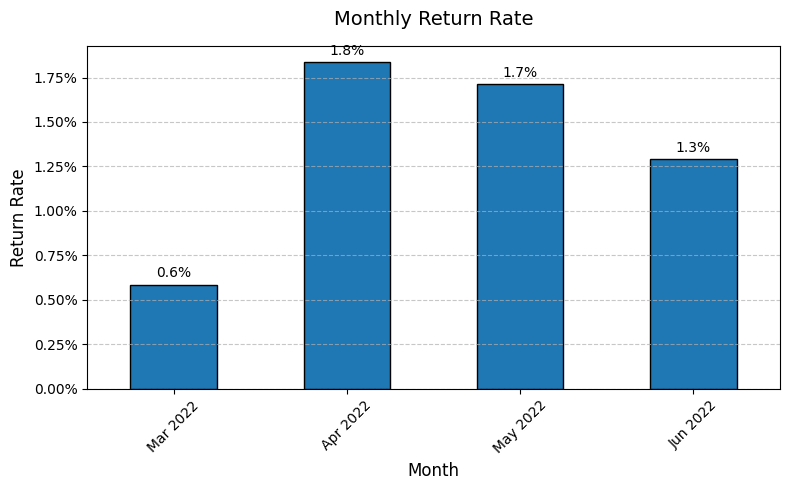

In [40]:
# Step 1: Convert 'date' to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Step 2: Extract month (as period) and assign to new column
df['Month'] = df['date'].dt.to_period('M')

# Step 3: Filter returned orders
returned_df = df[df['status'].isin(return_statuses)]

# Step 4: Count total and returned orders per month
total_per_month = df['Month'].value_counts().sort_index()
returns_per_month = returned_df['Month'].value_counts().sort_index()

# Step 5: Calculate return rate
return_rates = (returns_per_month / total_per_month).dropna()

# Convert period to timestamp for plotting
return_rates.index = return_rates.index.to_timestamp()

# Format index to month names (e.g., "Jan 2023")
return_rates.index = return_rates.index.strftime('%b %Y')

# Plot
plt.figure(figsize=(8, 5))
ax = return_rates.plot(kind='bar', color='#1f77b4', edgecolor='black')

plt.title('Monthly Return Rate', fontsize=14, pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Return Rate', fontsize=12)
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

# Annotate bars
for p in ax.patches:
    rate = p.get_height()
    ax.annotate(f"{rate:.1%}",
                (p.get_x() + p.get_width() / 2., rate),
                ha='center', va='bottom',
                fontsize=10,
                xytext=(0, 3),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


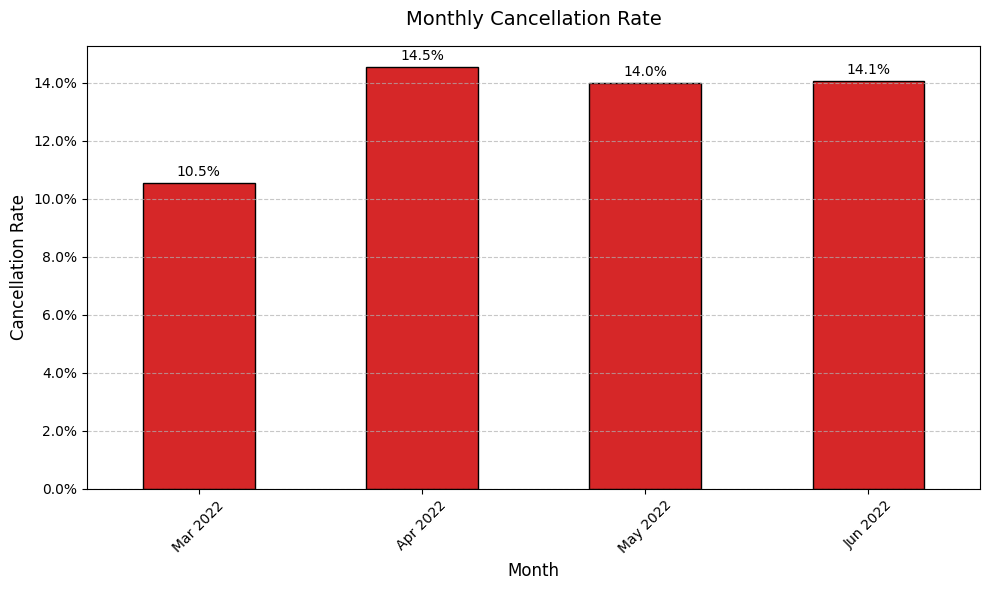

In [41]:
# And your list of cancelled statuses is:
cancelled_statuses = ['Cancelled']

# Step 1: Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Step 2: Extract month (as period) and assign to new column
df['Month'] = df['date'].dt.to_period('M')

# Step 3: Filter cancelled orders
cancelled_df = df[df['status'].isin(cancelled_statuses)]

# Step 4: Count total and cancelled orders per month
total_per_month = df['Month'].value_counts().sort_index()
cancellations_per_month = cancelled_df['Month'].value_counts().sort_index()

# Step 5: Calculate cancellation rate
cancellation_rates = (cancellations_per_month / total_per_month).dropna()

# Step 6: Convert period to timestamp for plotting
cancellation_rates.index = cancellation_rates.index.to_timestamp()

# Format index to month names (e.g., "Jan 2023")
cancellation_rates.index = cancellation_rates.index.strftime('%b %Y')

# Step 7: Plot
plt.figure(figsize=(10, 6))
ax = cancellation_rates.plot(kind='bar', color='#d62728', edgecolor='black')

plt.title('Monthly Cancellation Rate', fontsize=14, pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

# Annotate bars
for p in ax.patches:
    rate = p.get_height()
    ax.annotate(f"{rate:.1%}",
                (p.get_x() + p.get_width() / 2., rate),
                ha='center', va='bottom',
                fontsize=10,
                xytext=(0, 3),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Count of products by different size

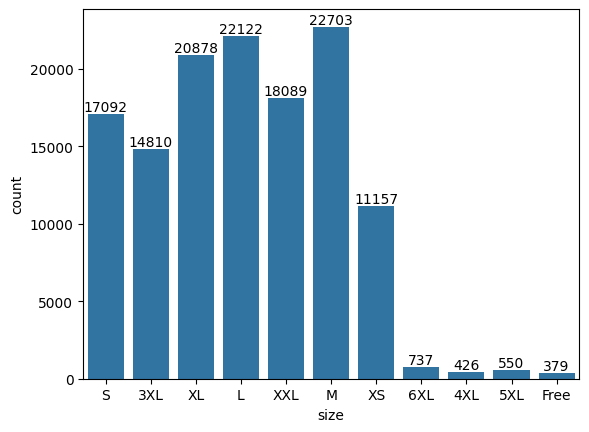

In [42]:
ax= sns.countplot(x= 'size', data= df)
for bars in ax.containers:
  ax.bar_label(bars)

Average order value (AOV)

In [43]:
# Basic AOV calculation
total_revenue = df['amount'].sum()
total_orders = len(df)

average_order_value = total_revenue / total_orders

print(f"Average Order Value (AOV): ₹{average_order_value:,.2f}")


Average Order Value (AOV): ₹555.64


AOV by category

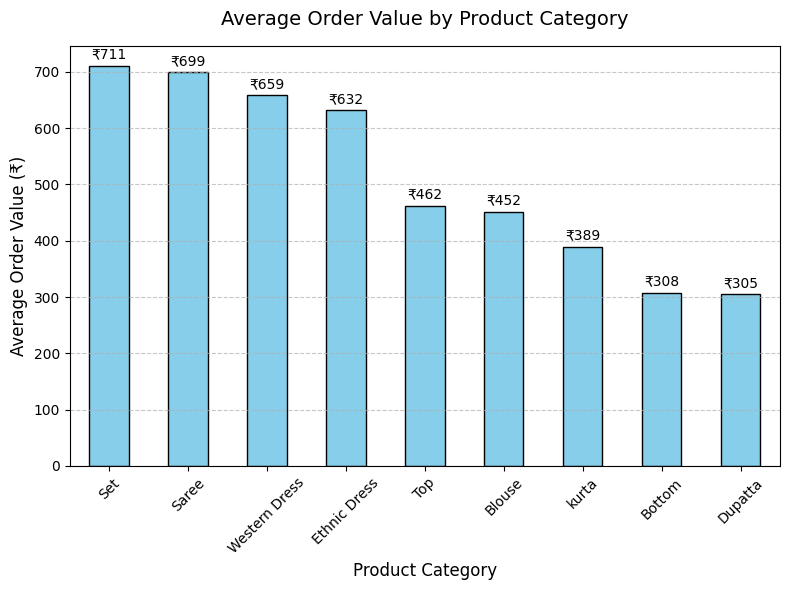

In [44]:
# Calculate AOV by Product Category
aov_by_category = df.groupby('category')['amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = aov_by_category.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Order Value by Product Category', fontsize=14, pad=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Order Value (₹)', fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"₹{value:,.0f}",
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=10,
                xytext=(0, 3),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


AOV by fulfillment type


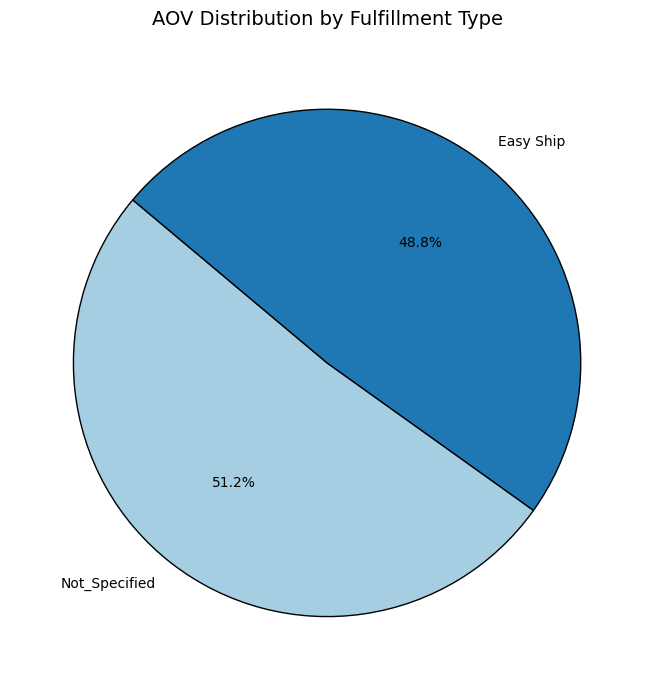

In [45]:
# Calculate AOV by Fulfillment Type
aov_by_fulfillment = df.groupby('fulfilled-by')['amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 7))
plt.pie(
    aov_by_fulfillment,
    labels=aov_by_fulfillment.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('AOV Distribution by Fulfillment Type', fontsize=14, pad=15)
plt.tight_layout()
plt.show()


AOV by shipping country

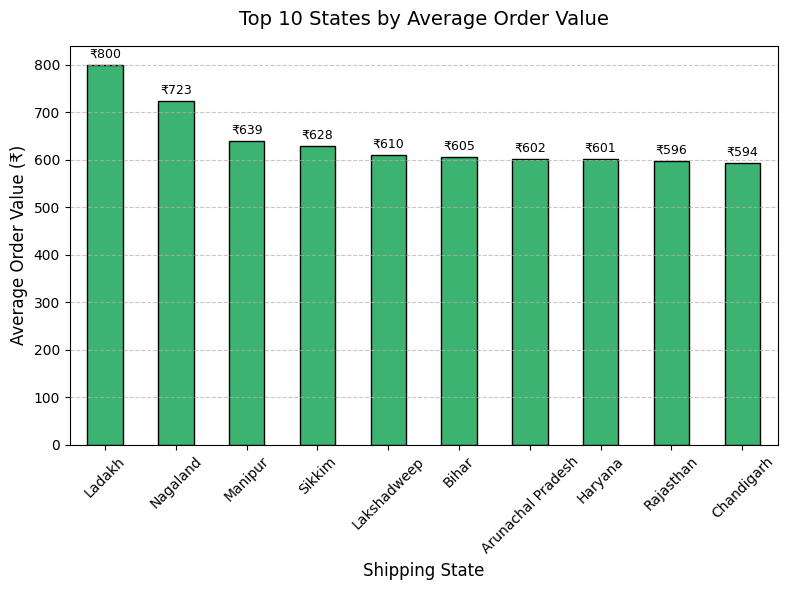

In [46]:
# Calculate AOV by Ship State and select top 10
aov_by_state = df.groupby('ship-state')['amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
ax = aov_by_state.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Top 10 States by Average Order Value', fontsize=14, pad=15)
plt.xlabel('Shipping State', fontsize=12)
plt.ylabel('Average Order Value (₹)', fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"₹{value:,.0f}",
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=9,
                xytext=(0, 3),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Fulfilled By analysis (Amazon vs merchant)

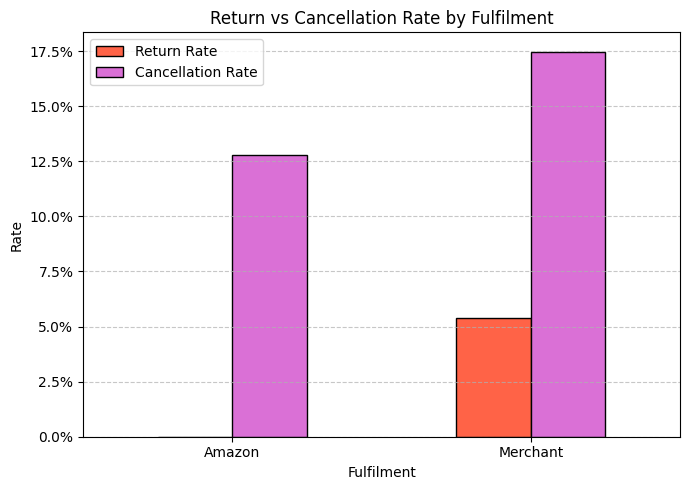

In [47]:
# Group by fulfilment type and calculate rates
fulfillment_groups = df.groupby('fulfilment')

# Total orders per fulfilment type
total_by_fulfilment = fulfillment_groups.size()

# Returned orders per fulfilment type
returned_by_fulfilment = df[df['status'].isin(return_statuses)].groupby('fulfilment').size()

# Cancelled orders per fulfilment type
cancelled_by_fulfilment = df[df['status'].isin(cancelled_statuses)].groupby('fulfilment').size()

# Calculate rates
return_rate = (returned_by_fulfilment / total_by_fulfilment).fillna(0)
cancel_rate = (cancelled_by_fulfilment / total_by_fulfilment).fillna(0)

# Combine into DataFrame
rate_df = pd.DataFrame({
    'Return Rate': return_rate,
    'Cancellation Rate': cancel_rate
})

# Plot
rate_df.plot(kind='bar', figsize=(7, 5), edgecolor='black', color=['tomato', 'orchid'])

plt.title('Return vs Cancellation Rate by Fulfilment')
plt.ylabel('Rate')
plt.xlabel('Fulfilment')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

plt.tight_layout()
plt.show()


Conclusions:
1. Highest sales occured in** April 2022** (the datset only contains 2022 data)
2. The most frequent size is **'** size
3. **Shipped** is the most frequent courier status among all of the categories
4. **Set** is the most frequent category for sales
5. **Maharahtra** is the state with highest sales
6. Maximum customers belong to B2C channel. Only a small percentage of them belong to B2B channel
7. Customers strongly prefer **expedited** shipping service
8. The overall return rate is **1.64%**
9. The cancellation rate is **14.12%**

Suggestions


1.   To reduce return and cancellation rates focus on categories with low return/ cancel rates like saree or top
2.  Shift docus to orders fulfilled with higher AOV and lower return rates like set or saree
3. Target top-performing regions- states/ regions with loyalty programs or premium offerings, like Maharashtra or Karnatka
4.  One can use time- based promotions and leverage days with higher sales (Sunday and Tuesday) for targeted flash deals
5. For days (Thursday and Friday) with lower sales one can have incentives or bundles to boost sales
6. since B2B segment accounts for only a small proprotion of sales, the business can explore opportunities in the segment by bulk discounts or targeted outreach.

